In [2]:
import numpy as np
import pandas as pd
import xarray as xr
from pathlib import Path #pour manipuler facilement les chemins des fichiers
import matplotlib.pyplot as plt

-----------------------

In [12]:
for subdir in sorted(Path('/homedata/nmpnguyen/IPRAL/SCC_produits/output/output/').iterdir()):
    subsubdir = sorted(subdir.iterdir())[0]
    print(sorted(subsubdir.glob('elic')))
    
def get_products_selected(main_path, day, product_name):
    product_path = Path(list_path).glob(f'**/{product_name}')
    def get_path_subdirectories(main_path, day):
        return list_path
    return product_path

[PosixPath('/homedata/nmpnguyen/IPRAL/SCC_produits/output/output/20200206/20200206sir8018/elic')]
[PosixPath('/homedata/nmpnguyen/IPRAL/SCC_produits/output/output/20200207/20200207sir8000/elic')]
[PosixPath('/homedata/nmpnguyen/IPRAL/SCC_produits/output/output/20200326/20200326sir1101/elic')]
[PosixPath('/homedata/nmpnguyen/IPRAL/SCC_produits/output/output/20200401/20200401sir1301/elic')]
[PosixPath('/homedata/nmpnguyen/IPRAL/SCC_produits/output/output/20200402/20200402sir0301/elic')]
[PosixPath('/homedata/nmpnguyen/IPRAL/SCC_produits/output/output/20200415/20200415sir8017/elic')]
[PosixPath('/homedata/nmpnguyen/IPRAL/SCC_produits/output/output/20200423/20200423sir8016/elic')]
[PosixPath('/homedata/nmpnguyen/IPRAL/SCC_produits/output/output/20200424/20200424sir8000/elic')]
[PosixPath('/homedata/nmpnguyen/IPRAL/SCC_produits/output/output/20200507/20200507sir8007/elic')]
[PosixPath('/homedata/nmpnguyen/IPRAL/SCC_produits/output/output/20200513/20200513sir8018/elic')]
[PosixPath('/homedat

-------------------------------------------

### Lecture du fichier des données brutes (LEVEL 1)

In [5]:
# DATA LEVEL 1
# il faut remplacer le chemin avec le votre
RAW_PATH = Path('/bdd/SIRTA/pub/basesirta/1a/ipral/2018/09/28/ipral_1a_Lz1R15mF30sPbck_v01_20180928_000000_1440.nc')

data1 = xr.open_dataset(RAW_PATH)
print(data1.variables)

Frozen({'time': <xarray.IndexVariable 'time' (time: 2287)>
array(['2018-09-27T23:59:34.000000000', '2018-09-28T00:00:04.000000000',
       '2018-09-28T00:00:34.000000000', ..., '2018-09-28T23:58:20.000000256',
       '2018-09-28T23:58:50.000000000', '2018-09-28T23:59:21.000000000'],
      dtype='datetime64[ns]')
Attributes:
    standard_name:  time
    bounds:         time_bnds, 'range': <xarray.IndexVariable 'range' (range: 4000)>
array([1.5000e+01, 3.0000e+01, 4.5000e+01, ..., 5.9970e+04, 5.9985e+04,
       6.0000e+04], dtype=float32)
Attributes:
    long_name:  range above ground level
    units:      m, 'time_bnds': <xarray.Variable (time: 2287, nv: 2)>
array([['2018-09-27T23:59:34.000000000', '2018-09-28T00:00:03.000000000'],
       ['2018-09-28T00:00:04.000000000', '2018-09-28T00:00:34.000000000'],
       ['2018-09-28T00:00:34.000000000', '2018-09-28T00:01:04.000000256'],
       ...,
       ['2018-09-28T23:58:20.000000256', '2018-09-28T23:58:50.000000000'],
       ['2018-09-28T23

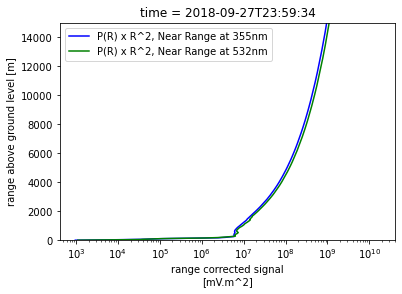

In [11]:
# plot 1 profil 
fig, ax = plt.subplots()
data1.isel(time=0)['rcs_12'].plot(y='range', ylim=(0, 15000), xscale='log', label='P(R) x R^2, Near Range at 355nm', color='b')
data1.isel(time=0)['rcs_16'].plot(y='range', ylim=(0, 15000), xscale='log', label='P(R) x R^2, Near Range at 532nm', color='g')
ax.legend()

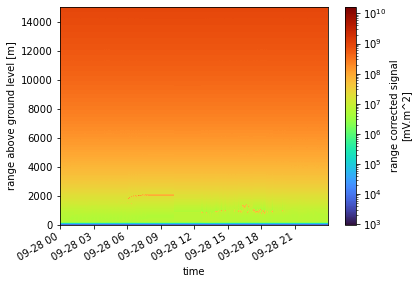

In [12]:
# plot tous les profils = 1 quicklook, 532nm, colorbar en log 
from matplotlib.colors import LogNorm

fig, ax = plt.subplots()
data1['rcs_12'].plot(y='range', x='time', ylim=(0, 15000), cmap='turbo', norm=LogNorm())

### Lecture du fichier des données calibrées (LEVEL 2)

In [13]:
CALIB_PATH = Path('/homedata/nmpnguyen/IPRAL/NETCDF/ipral_calib_v01_20180928_000000_1440.nc')

data2 = xr.open_dataset(CALIB_PATH)
data2

<xarray.Dataset>
Dimensions:                           (range: 4000, time: 2287)
Coordinates:
  * time                              (time) datetime64[ns] 2018-09-27T23:59:...
  * range                             (range) float32 15.0 30.0 ... 6e+04
Data variables: (12/15)
    Altitude                          (range) float32 ...
    Raw_AnalogNR_355                  (time, range) float64 ...
    Raw_AnalogNR_532                  (time, range) float64 ...
    Model_Pressure                    (time, range) float64 ...
    Model_Temperature                 (time, range) float64 ...
    Model_Molecular_Backscatter_355   (time, range) float64 ...
    ...                                ...
    Total_Calib_Attn_Backscatter_355  (time, range) float64 ...
    Total_Calib_Attn_Backscatter_532  (time, range) float64 ...
    Total_ScattRatio_355              (time, range) float64 ...
    Total_ScattRatio_532              (time, range) float64 ...
    C_355                             (time) float64 ...
    C_532                             (time) float64 ...
Attributes:
    Instrument_name:         IPSL HiPerformance multi-wavelength Raman Lidar
    Start_Datetime:          2018-09-27T23:59:34.000000000
    End_Datetime:            2018-09-28T23:59:21.000000000
    Latitude:                48.71799850463867
    Longitude:               2.2070000171661377
    Responsable_data:        N.M.Phuong Nguyen (phuong.nguyen@latmos.ipsl.fr)
    Responsable_instrument:  Christophe Pietras (christophe.pietras@lmd.ipsl.fr)

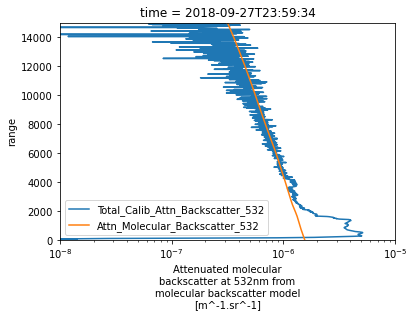

In [14]:
fig, ax = plt.subplots()
data2.isel(time=0)['Total_Calib_Attn_Backscatter_532'].plot(y='range', ylim=(0, 15000), xscale='log', xlim=(1e-8, 1e-5), label='Total_Calib_Attn_Backscatter_532')
data2.isel(time=0)['Attn_Molecular_Backscatter_532'].plot(y='range', ylim=(0, 15000), xscale='log', label='Attn_Molecular_Backscatter_532')
ax.legend()

In [16]:
data1.to_netcdf('ipral_1a_raw_v01_20180928_000000_1440.nc', 'w')

In [14]:
x = xr.open_dataset('/scratchx/nmpnguyen/IPRAL/raw/SR_histogram/IPRAL_2018_validated_profiles4_allatb355.nc')
y = xr.open_dataset('/scratchx/nmpnguyen/IPRAL/raw/SR_histogram/IPRAL_2018_validated_profiles4_allatb532.nc')

In [18]:
x['calibrated'][0,:]

<xarray.DataArray 'calibrated' (range: 666)>
array([ 1.960125e-06, -3.505533e-06,  7.026827e-07, ..., -1.682528e-06,
        3.853341e-06,  8.397533e-05])
Coordinates:
    time        datetime64[ns] 2018-02-21T12:00:00
  * range       (range) float32 5.01e+03 5.025e+03 ... 1.497e+04 1.498e+04
    wavelength  int64 355

AttributeError: 'function' object has no attribute 'ravel'

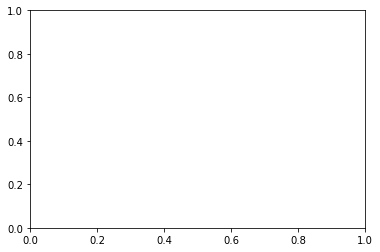

In [15]:
fig, ax = plt.subplots()
h = ax.hist2d(x.values.ravel(), y.values.ravel(), bins=100, range=[[-1, 40],[-1, 80]], norm=LogNorm())
plt.colorbar(h[3], ax=ax)
ax.set(xlabel='sr355_mesured', ylabel='sr532_mesured')